## Fixed Coupon Bonds

##### Fixed Coupon Bond Valuation

> $$ P = \sum_{i=1}^{n} \frac{C}{(1+r)^{i}} + \frac{Notional}{(1+r)^{n}}$$

> $P$ is present value of the bond, $C$ is the coupon, $i$ is when cashflow is received, $n$ is maturity, and $r$ is the discount rate. 

In [1]:
# Function to compute price of a fixed coupon bond

def fixed_coupon_bond(Notional, C_rate, n, r, cf):
    
    # C_rate is annual coupon rate
    # cf is compounding frequency
    eff_C_rate = C_rate/cf
    
    # Coupons
    C = eff_C_rate*Notional
    
    # ensure n is list or tuple
    if type(n) is list or type(n) is tuple:
        
        P = []
        
        for i in n:
            if i == n[-1]:
                value = (C+Notional)/(1+r)**i
                P.append(value)
                
            else:
                value = C/(1+r)**i
                P.append(value)
                
        return(sum(P))
    
    else:
        raise TypeError("argument should be a list or tuple")

> Suppose we want to value a 20 year maturity bond with a Notional of 100,000, semi-annual frequency interest payments, and annual coupon rate of 5%. Let risk free rate be 3%.

In [2]:
n = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
    5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
    10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0,
    19.5, 20.0]

Notional = 100000

C_rate = 0.05

r = 0.03

cf = 2

fixed_coupon_bond(Notional, C_rate, n, r, cf)

130308.73235005929

##### Yield

> Bond's yield is the discount rate which when applied to all cash flows would make the theoretical bond price equal to the market price of the bond.

In [3]:
def ytm(y):
    
    n = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
    5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
    10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0,
    19.5, 20.0]

    Notional = 100000

    C_rate = 0.05

    r = 0.03

    cf = 2
    
    # C_rate is annual coupon rate
    # cf is compounding frequency
    eff_C_rate = C_rate/cf
    
    # Coupons
    C = eff_C_rate*Notional 
    
    # Market Price
    market_price = 120000
    
    P = []
        
    for i in n:
        if i == n[-1]:
            value = (C+Notional)/(1+y)**i
            P.append(value)
                
        else:
            value = C/(1+y)**i
            P.append(value)
        
    bond_price = sum(P)
    
    return(market_price - bond_price)
    

In [4]:
import scipy
from scipy.optimize import newton

# calculate yield
y = scipy.optimize.newton(ytm, 0.001)
y

0.03622064171917195

##### Modified Duration

> Sensitivity of the bond price with respect to the yield. Percenage change in bond price due to unit change in yield.

 $$ D_{modified} = \frac{D}{1+y_{m}/m} $$

> D is the Macaulay duration, $y_{m}$ is the yield to maturity (periodically compounded), and m is compounding frequency per year.

> Macaulay duration is weighted average time for a bond holder to receive cash flows.

$$ D = \sum_{i=1}^{n} t_{i} \left[\frac{c_{i}e^{-yt_{i}}}{B}\right] $$

> $c_{i}$ is the cash flow for payment $i$, $t_{i}$ is the time in years until $i$th cash flow is received, $B$ is bond price, and $y$ is yield to maturity (continuously compounded).

In [5]:
import numpy as np
import math

# Function to compute Modified Duration

def mod_duration(t, c, y_m, B, m):
    
    # Convert yield to continuous compounding
    y = m*math.log(1 + y_m/m)
    
    # Calculate Macaulay Duration
    D = []
    
    for i in range(len(t)):
        value = t[i]*((c[i]*math.exp(-y*t[i]))/B)
        D.append(value)
        
        # Calculate Modified Duration
        mod_duration = sum(D)/(1 + y_m/m)
        
    return(mod_duration)

In [6]:
### Inputs: ###

# times
t = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
    5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
    10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0,
    19.5, 20.0]

# Principal amount
Notional = 100000

# risk free rate
r = 0.03

# cash flows
c = []
for i in t:
    if i == t[-1]:
        value = ((0.05/2)*Notional + Notional)/(1+r)**i
        c.append(value)
                
    else:
        value = ((0.05/2)*Notional)/(1+r)**i
        c.append(value)
                

# yield to maturity
y_m = scipy.optimize.newton(ytm, 0.001)

# Bond price
B = sum(c)

# compounding frequency 
m = 2

### Modified Duration ###
mod_duration(t, c, y_m, B, m)

7.4322626275863914

##### Effective Duration

> Measures change in Bond's value due to a 1% change in the yield of the bond across all maturities.

$$ \text{Effective Duration} = \frac {B_{-\Delta y} - B_{+ \Delta y}}{2B\Delta y} $$

> $B_{-\Delta y}$ is bond's value if yield falls by a percentage amount, $B_{+ \Delta y}$ is bond's value if yield increases by a percentage amount, $B$ is bond's present value, and $\Delta y$ is the yield change.

In [7]:
# Function to compute Effective Duration

def eff_duration(B, delta_y, Notional, C, t, y_m, m):
    
    # Convert yield to continuous compounding
    y = m*math.log(1 + y_m/m)
    
    y_down = y - delta_y
    y_up = y + delta_y
    
    # compute bond prices
    B = []
    B_down = []
    B_up = []
    
    for i in t:
        if i == t[-1]:
        
            # B
            value = (C+Notional)/(1+y)**i
            B.append(value)
        
            # B_down
            value_down = (C+Notional)/(1+y_down)**i
            B_down.append(value_down)
        
            # B_up
            value_up = (C+Notional)/(1+y_up)**i
            B_up.append(value_up)
        
        else:
            
            # B
            value = C/(1+y)**i
            B.append(value)
            
            # B_down
            value_down = C/(1+y_down)**i
            B_down.append(value_down)
            
            # B_up
            value_up = C/(1+y_up)**i
            B_up.append(value_up)
            
    ED = (sum(B_down) - sum(B_up))/(2*sum(B)*delta_y)
    
    return(ED)

In [8]:
### Inputs: ###
B = 130308.73
delta_y = 0.01
Notional = 100000
C = 2500
t = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
    5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
    10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0,
    19.5, 20.0]
y_m = scipy.optimize.newton(ytm, 0.001)
m = 2

### Effective Duration ###
eff_duration(B, delta_y, Notional, C, t, y_m, m)

13.163852162909398

##### Convexity

> How a nonlinear bond price function of interest rates changes due to interest rate changes. Change in duration due to interest rate changes.

$$ \text{Convexity} = \frac{\sum_{i=1}^{n} c_{i}t_{i}^{2}e^{-yt_{i}}} {B} $$

In [9]:
# Function to compute convexity

def convexity(t, c, y_m, m, B):
    
    # Convert yield to continuous compounding
    y = m*math.log(1 + y_m/m)
    
    Convexity = []
    
    for i in range(len(t)):
        value = c[i]*(t[i]**2)*math.exp(-y*t[i])
        Convexity.append(value)
        
    C = sum(Convexity)/B
        
    return(C)

In [10]:
### Inputs: ###
t = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
    5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
    10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5,
    15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0,
    19.5, 20.0]
y_m = scipy.optimize.newton(ytm, 0.001)
m = 2
B = 130308.73

# Cash flows
Notional = 100000
r = 0.03
c = []
for i in t:
    if i == t[-1]:
        value = ((0.05/2)*Notional + Notional)/(1+r)**i
        c.append(value)
                
    else:
        value = ((0.05/2)*Notional)/(1+r)**i
        c.append(value)

### Convexity ###
convexity(t, c, y_m, m, B)

123.61410974106931

##### Bootstrap (semi-annual coupons)

In [11]:
import pandas as pd

data = {'Bond Principal ($)': [100, 100, 100, 100, 100],
        'Time to Maturity (years)': [0.25, 0.50, 1.00, 1.50, 2.00],
        'Annual Coupon ($)': [0, 0, 0, 8, 12],
        'Bond Price ($)': [97.5, 94.9, 90.0, 96.0, 101.6]}

b_data = pd.DataFrame(data=data)
b_data

,Bond Principal ($),Time to Maturity (years),Annual Coupon ($),Bond Price ($)
0,100,0.25,0,97.5
1,100,0.50,0,94.9
2,100,1.00,0,90.0
3,100,1.50,8,96.0
4,100,2.00,12,101.6


> 3-month rate $R_{0.25}$    

$$ 100 = 97.5e^{R_{0.25}*0.25} $$

In [12]:
R_025 = math.log(b_data.iloc[0,0]/b_data.iloc[0,3])/b_data.iloc[0,1]
R_025

0.10127123193715915

> 6-month rate $R_{0.50}$    

$$ 100 = 94.9e^{R_{0.50}*0.50} $$

In [13]:
R_050 = math.log(b_data.iloc[1,0]/b_data.iloc[1,3])/b_data.iloc[1,1]
R_050

0.10469296074441839

> 1-year rate $R_{1.00}$    

$$ 100 = 90.0e^{R_{1.00}*1.00} $$

In [14]:
R_100 = math.log(b_data.iloc[2,0]/b_data.iloc[2,3])/b_data.iloc[2,1]
R_100

0.10536051565782635

> 1.5-year rate $R_{1.00}$

$$ 4e^{-R_{0.50}*0.50} + 4e^{-R_{1.00}*1.00} + 104e^{-R_{1.50}*1.50} = 96 $$

In [15]:
R_150 = -math.log((b_data.iloc[3,3] - (b_data.iloc[3,2]/2)*math.exp(-R_050*b_data.iloc[1,1]) - (b_data.iloc[3,2]/2)*math.exp(-R_100*b_data.iloc[2,1]))/(b_data.iloc[3,0] + b_data.iloc[3,2]/2))/(b_data.iloc[3,1])  
R_150

0.1068092638817053

> 2.0-year rate $R_{2.00}$

$$ 6e^{-R_{0.50}*0.50} + 6e^{-R_{1.00}*1.00} + 6e^{-R_{1.50}*1.50} + 106e^{-R_{2.00}*2.00} = 101.6 $$

In [16]:
R_200 = -math.log((b_data.iloc[4,3] - (b_data.iloc[4,2]/2)*math.exp(-R_050*b_data.iloc[1,1]) - (b_data.iloc[4,2]/2)*math.exp(-R_100*b_data.iloc[2,1]) - (b_data.iloc[4,2]/2)*math.exp(-R_150*b_data.iloc[3,1]))/(b_data.iloc[4,0] + b_data.iloc[4,2]/2))/(b_data.iloc[4,1])  
R_200

0.10808027549746793

In [17]:
zero_rates = pd.DataFrame(data={'Time to Maturity (years)': [0.25, 0.50, 1.00, 1.50, 2.00],
                                'Zero Rate (%)': [R_025*100, R_050*100, R_100*100, R_150*100, R_200*100]})

zero_rates

,Time to Maturity (years),Zero Rate (%)
0,0.25,10.127123
1,0.50,10.469296
2,1.00,10.536052
3,1.50,10.680926
4,2.00,10.808028


Text(0, 0.5, 'Zero Rate (%)')

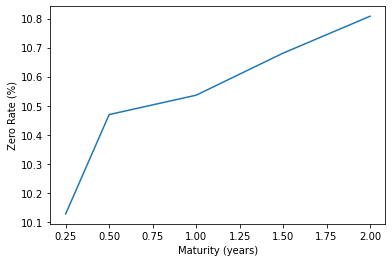

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(zero_rates['Time to Maturity (years)'], zero_rates['Zero Rate (%)'])
ax.set_xlabel('Maturity (years)')
ax.set_ylabel('Zero Rate (%)')